In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_info) = tfds.load(
    'plant_village',
    split='train',
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.DQ5ZSO_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
class_names = ds_info.features['label'].names
print(f"Number of classes: {len(class_names)}")
print("Example classes:", class_names[:10])

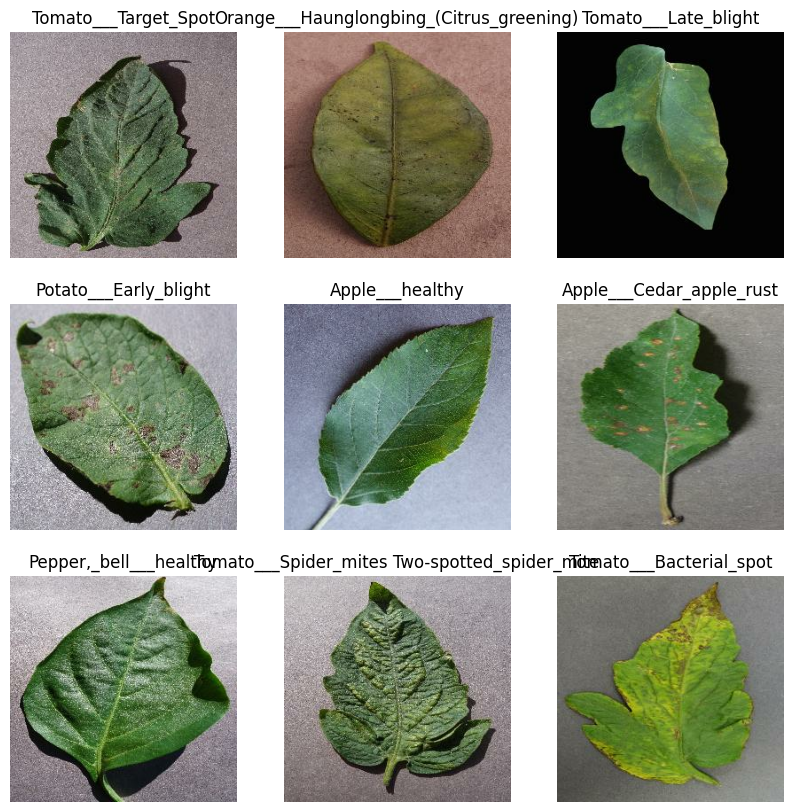

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")
plt.show()

In [ ]:
def preprocess(image, label):
  image = tf.image.resize(image, (128, 128)) / 255.0
  return image, label

train_data = tfds.load('plant_village', split='train[:80%]', as_supervised=True)
test_data = tfds.load('plant_village', split='train[80%:]', as_supervised=True)

train_data = train_data.map(preprocess).shuffle(1000).batch(32)
test_data = test_data.map(preprocess).batch(32)



In [ ]:
import tensorflow as tf

layers = tf.keras.layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)

Epoch 1/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.2768 - loss: 2.7453 - val_accuracy: 0.7251 - val_loss: 0.9339
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.6398 - loss: 1.2031 - val_accuracy: 0.8050 - val_loss: 0.6158
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.7435 - loss: 0.8132 - val_accuracy: 0.8584 - val_loss: 0.4489
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8033 - loss: 0.6257 - val_accuracy: 0.8941 - val_loss: 0.3362
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8372 - loss: 0.5089 - val_accuracy: 0.9074 - val_loss: 0.2833
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8617 - loss: 0.4179 - val_accuracy: 0.9201 - val_loss: 0.2441
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8845 - loss: 0.3490 - val_accuracy: 0.9316 - val_loss: 0.2049
Epoch 8/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9023 -

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
  img_path = file_name
  img = image.load_img(img_path, target_size=(128, 128))
  img_array = image.img_to_array(img) / 255.0
  img_array = tf.expand_dims(img_array, axis=0)

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  disease_name = class_names[predicted_class]
  confidence = np.max(prediction) * 100

  plt.imshow(img)
  plt.title(f"Prediction: {disease_name}\nConfidence: {confidence:.2f}%")
  plt.axis("off")
  plt.show()

Saving 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG to 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG


NameError: name 'tf' is not defined